# The $p$-adic Numbers for Data Scientists

Thomas Liebig, Franziska Jahnke - 2023

Find a copy of this material online at [github](https://github.com/thomasliebig/jupyterlite).

Cite as 
```bibtex
@misc{padic23,
  author        = {Thomas Liebig, Franziska Jahnke},
  title         = {The $p$-adic numbers for Data Scientists},
  month         = {May},
  year          = {2023},
  publisher     = {TU Dortmund}
}
```

prerequisites:
```bash
conda update --all
conda install -c conda-forge rise
conda install -c conda-forge jupyter_contrib_nbextensions
conda install nbconvert
pip install -m notebook==6.1.5
jupyter contrib nbextension install --user
jupyter nbextension enable splitcell/splitcell
jupyter-nbextension enable rise --py --sys-prefix
jupyter-nbextension enable rise --py --user
```


In [1]:
from manim import *

config.media_width = "100%"
config.pixel_width = 200
config.pixel_height = 200

config.verbosity = "CRITICAL"

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use(f'style/lamarr_dark.mplstyle')

Manim Community v0.18.0

<div class="alert alert-block alert-info">
<b>Tip:</b> These Notes are best read without code blocks. Run next cell and press button, to hide all code cells.
</div>

In [1]:
# hide input cells
# copied from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer#answer-28073228
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code cells. (just working in jupyter notebook, not jupyterlab)"></form>''')

## Data Science as a Catalyst in Physical Process Investigations

### Origin of Data
* observe physical processes (in real world)
* By observation, we make measurements, represented in some (mathematical) space 
  ($\mathbb{B}$, $\mathbb{Z}$, $\mathbb{N}$, $\mathbb{Q}$, vectors, graphs, strings, $\ldots$ tuples, compounds, images, sounds, $\ldots$)
* Data is partial representation of a snapshot (only valid for specific space, time)
* Observation, eventually is invasive and changes physical process

In [9]:
%%manim -v WARNING --disable_caching --progress_bar None -qm CorridorScene

from manim import config as global_config
config = global_config.copy()
myTemplate = TexTemplate()
myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
myTemplate.add_to_preamble(r"\usepackage[sfmath,lighttext]{kpfonts}")
myTemplate.add_to_preamble(r"\usepackage{amsmath,MnSymbol,wasysym}")  
config["tex_template"] = myTemplate
config.tex_template=myTemplate

from manim import *

class CorridorScene(Scene):
    def construct(self):
        # Create a corridor
        self.camera.background_color = "#0c122b"
        corridor = Rectangle(width=10, height=3, color=WHITE)
        self.add(corridor)

    
        # Highlight the density measurement area
        density_area = Rectangle(width=1, height=3).set_color("#E82E82").move_to(corridor.get_center())
        density_area.set_fill("#E82E82",opacity=.6)
        self.add(density_area)

        # Highlight the flow measurement line
        flow_line = Line(UP, DOWN).next_to(density_area, RIGHT, buff=0).shift(RIGHT*2)
        flow_line.set_color("#E82E82")
        self.add(flow_line)
        
        # LaTeX annotations
        flow_annotation = MathTex(r"\mathsf{q(x,t)= \frac{\#obj}{\Delta t}}").next_to(flow_line, UP *2.5)
        density_annotation = MathTex(r"\mathsf{\rho(x,t) = \frac{\#obj}{\Delta x}}").next_to(density_area, DOWN)
        self.add(flow_annotation, density_annotation)
        
        # Add moving points
        points = [Dot().set_color("#009EE3").move_to(corridor.get_left() + RIGHT * i) for i in range(1, 10)]
        self.add(*points)

        # Animate points moving through the corridor
        self.play(*[ApplyMethod(point.shift, RIGHT * 9, rate_func=linear) for point in points])


        # Keep the scene static for a few seconds
        # self.wait(3)


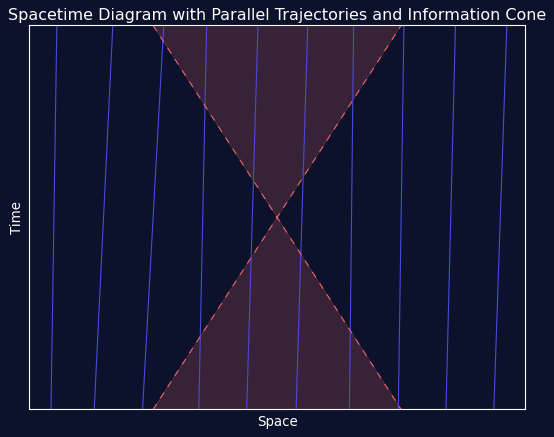

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the time and space ranges
time = np.linspace(0, 10, 400)
space = np.linspace(-10, 10, 400)

# Draw trajectories - these are typically lines with the same slope in spacetime diagrams
velocity = 5  # slope of the lines, change this value for different velocities
initial_positions = np.linspace(-9, 9, 10)  # starting points for the trajectories
for position in initial_positions:
    v=velocity+abs(np.random.normal(5, 30,1))
    ax.plot(space, v * (space - position) + 5, color=f'C0')

# Draw the information cone for an event at time 5, space 0
event_time = 5
event_space = 0
cone_space = np.linspace(-5, 5, 100)
ax.plot(event_space + cone_space, event_time + cone_space, color=f'C1', linestyle='--')
ax.plot(event_space + cone_space, event_time - cone_space, color=f'C1', linestyle='--')

# Fill the future-directed information cone area
#ax.fill_between(event_space + cone_space, event_time + cone_space, event_time, color='red', alpha=0.1)
x = [-5, 5, 0, -5, 5 ]
y = [0, 0, 5, 10, 10 ]
plt.fill(x, y, c=f'C1', alpha=0.2)

# Set up limits, labels, and grid
ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_title('Spacetime Diagram with Parallel Trajectories and Information Cone')
ax.grid(True)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()


### Data Models pose Assumptions on Physical Process

* Conservation law $\rho_t(x,t)+q_x(x,t)=0$
* Balance of momentum
* Markov Assumption
* Tobler's Law

e.g. Burgers Turbulence
$$\frac{\partial \rho}{\partial t} + \frac{\partial (\rho v)}{\partial x} = 0$$

Already usage of real numbers $\mathbb{R}$ poses assumption of Archimedian property, whereas we may get infinitesimal small observations or values. 

This contradicts our intuition, where we just record rationals $\mathbb{Q}$ (compare Planck units).

## Motivation: Leaving the Reals Behind

recall integer numbers in base 10
$$\begin{align}
7 &=7 + 0 \cdot 10 & \\
13 &=3 + 1\cdot 10 &\\
305 &=5 + 0\cdot 10 + 3 \cdot 10^2
\end{align}$$

Rational numbers are fractions of integers, have repeating or terminating decimal expansion

$$105/4 = 21.25 $$
$$10/3 = 3.33\ldots$$

we do the same as above but now have negative powers

$$21.25 = \frac{5}{100}+\frac{2}{10}+1+2\cdot 10$$
$$3.33 = 3+\frac{3}{10}+\frac{3}{10^2}+\frac{3}{10^3}+\cdots$$

note: second is infinite and goes on and on.

Every real number can be expressed as a polynomial in powers of 10 For example

$$\pi = 3 + \frac{1}{10}+\frac{4}{10^2}+\frac{1}{10^3}+\cdots$$

Consider some computation $n_{t+1}=n_t^2$ with $n_0 = 5$
$$\begin{align*}
5^2 &=25\\
25^2 &=625\\
625^2 &= 390,625
\end{align*}$$

* *Observation* : Last digits are contained in the square

Does this pattern continue?

$$\begin{align*}
390,625^2 &= 152,587,890,625 \\
90,625^2 &= 8,212,890,625 \\
8,212,890,625^2 &= 67,451,572,418,212,890,625 
\end{align*}$$

* These numbers end in itself
* if you continue you'll reach the point where $n^2=n$ ,i.e., a number with infinitely many digits to the left of the decimal point.
* Why do we care? Isn't this just infinity?

> In this course we want to show that these numbers do make sense. These numbers belong to a different number system and allow to solve problems that are impenetrable using ordinary real numbers.


$$\begin{align*}
\ldots& 23416298634\\
 + \ldots & 98634534523\\
\end{align*}$$

* Can you add them together?

$$\begin{align*}
\ldots& 23416298634\\
 + \ldots & 98634534523\\
\ldots & \overline{22050833157}
\end{align*}$$

* sure, just start right and add digit by digit

What about Multiplication?
$$\begin{align*}
\ldots& 23416298634\\
 \times \ldots & 98634534523\\
\end{align*}$$

What about Multiplication?
$$\begin{align*}
\ldots& 23416298634\\
 \times \ldots & 98634534523\\
 \ldots & \overline{94538138092} & (4\cdot 98634534523) \\
 \ldots & 59036035690 & (30 \cdot 98634534523) \\
 \ldots &  80720713800 & (600 \cdot 98634534523) \\
 \ldots &  76276184000 & (8000 \cdot 98634534523) \\
 +\ldots &  08107070000 & (90000 \cdot 98634534523) \\
  & \vdots \\
  \ldots & \overline{16150741582}
\end{align*}$$

Let's take the following 10-adic number and multiply it by $7$
$$\begin{align*}
\ldots& 857142857143\\
 \times  & \phantom{00000000000}7\\
 & \overline{\phantom{00000000000}1}
\end{align*}$$

$$\ldots857142857143=\frac{1}{7}$$
* there are rational numbers within the 10-adic numbers
* without having to use the divided by symbol

Exercise: 
* find a number that equals $1/3$ 
* $\ldots???????????=\frac{1}{3}$

$$\begin{align*}
\ldots& \text{?????????????}\\
 \times  & \phantom{00000000000}3\\
 & \overline{000000000001}
\end{align*}$$


$$\begin{align*}
\ldots& \text{666666666667}\\
 \times  & \phantom{00000000000}3\\
  & \overline{\phantom{0000000000}21} \\
  & \phantom{000000000}180 \\
  & \phantom{00000000}1800 \\
  & \phantom{0000000}18000 \\
  & \phantom{000000}180000 \\
  & \phantom{00000}1800000 \\
  & \phantom{0000}18000000 \\
  & \phantom{000}180000000 \\
  & \phantom{00}1800000000 \\
  & \phantom{0}18000000000 \\
  & \phantom{}180000000000 \\
 + \ldots & 800000000000 \\
\ldots & \overline{000000000001}
\end{align*}$$

Let's consider this number
$$\ldots999999999.$$

$$\tag{1}\ldots999999999.=m$$
$$\tag{2}\ldots9999999990.=10m$$

(1)-(2):
$$9=-9m$$
$$m=-1$$
$$999999999.=-1$$

Test:
$$\begin{align*}
\ldots& \text{999999999}\\
 +  & \phantom{00000000}1\\
\ldots & \overline{000000000}
\end{align*}$$

This means $$\ldots 999999996=-4$$

* The 10-adics contain also negative numbers
* no negative sign necessary
* to subtract just add the negative of that number

A simple algorithm to get $-m$ given $m$:
* Take the 9's complement (per digit)
* Add 1

Example:
$$1/3= \ldots 6666667$$
$$-1/3=?$$
$$-1/3=\ldots 3333332+1=\ldots 3333333$$

summary 10-adic numbers
* Addition and Multiplication as expected
* contain fractions and negative numbers without additional symbols
* just one problem: 
  - remember example from the beginning where $n^2=n$, 
  - reformulate $n^2-n=0$, $n(n-1)=0$, 
  - we have more solutions than just $0$ or $1$ to this equation
  - a product could be zero, without any factor being zero
  - this causes problems solving polynomial equations, e.g., $(x+3)(x-7)(x+2)=0$, does not have unique solutions 
  
* to avoid it, we take a prime number base $p$: $p$-adic numbers (any prime is possible)

remember the example from above, where $n^2=n$ ?

That's a problem, as the equation $n(n-1)=0$ has solutions besides $0$ and $1$.

We can not solve equations in 10-adic numbers, as from $a_0\cdot a_1 = 0$ does not follow that at least one $a_i = 0$.

Let's take a different base, e.g. $p=5$

$$2=2+0\cdot 5$$
$$5=0+1\cdot 5$$
$$108=3+1\cdot 5+4\cdot 5^2 $$

Addition
$$\begin{align*}
& \ldots 4200022_5 \\
+ & \ldots 4220014_5 \\
& \ldots \overline{3420041_5}
\end{align*}$$

Multiplication

$$\begin{align*}
& \ldots \phantom{0}4200022_5 \\
\times & \ldots \phantom{0}4220014_5 \\
%\hline
& \ldots \overline{13440033}_5 \quad (2\cdot 4220014_5) \\
& \ldots 34400330_5 \quad (10\cdot 4220014_5) \\
&   \ldots 03300000_5 \quad (6250\cdot 4220014_5) \\
& \ldots 21000000_5 \quad (62500\cdot 4220014_5) \\
+ & \phantom{\ldots} \phantom{0000000} \vdots \\
& \ldots \overline{33140413_5}
& \vdots
\end{align*}$$

Negative Number
$$\begin{align*}
& \ldots 444444_5 \\
+ & \ldots \phantom{00000}1_5 \\
& \ldots \overline{000000_5}
\end{align*}$$

Fractions

$$\begin{align*}
& \ldots \phantom{0}32412033_5 \\
\times & \ldots \phantom{0000000}12_5 \\
%\hline
& \ldots \overline{\phantom{0000000}41}_5 \quad (3\cdot 12_5) \\
& \ldots \phantom{000000}410_5 \quad (15\cdot 12_5) \\
& \ldots \phantom{0000}24000_5 \quad (250\cdot 12_5) \\
& \ldots \phantom{000}120000_5 \quad (625\cdot 12_5) \\
+ & \phantom{\ldots} \phantom{0000000} \vdots \\
& \ldots \overline{\phantom{00000000}1_5}
\end{align*}$$

$$32412033_5 = \frac{1}{7}$$

Square root of -1 $\sqrt{-1}$

$$\begin{align*}
& \ldots 3032431212_5 \\
\times & \ldots 3032431212_5 \\
%\hline
& \ldots \overline{1120412424}_5 \quad (2\cdot 3032431212_5) \\
& \ldots 0324312120_5 \quad (5\cdot 3032431212_5) \\
& \ldots 2041242400_5 \quad (50\cdot 3032431212_5) \\
&   \ldots 2431212000_5 \quad (125\cdot 3032431212_5) \\
& \ldots 3441410000_5 \quad (1875\cdot 3032431212_5) \\
+ & \phantom{\ldots} \phantom{0000000} \vdots \\
& \ldots \overline{4444444444_5}
& \vdots
\end{align*}$$

$$\ldots 3032431212_5^2=-1 $$

### Overcoming Archimedian Axiom

<div class="alert alert-block alert-info">
<b>Literature:</b>Andrei Khrennikov. Interpretations of probability. Walter de Gruyter, 2009</div>

Let $F$ be a ring. A *norm* is a mapping $|\cdot|_{F}: F \rightarrow \mathbb{R}_{+}$ satisfying the following conditions:

1. $|x|_{F}=0 \Leftrightarrow x=0$ and $|1|_{F}=1$
2. $|xy|_{F} \leq |x|_{F}|y|_{F}$
3. $|x+y|_{F} \leq |x|_{F}+|y|_{F}$ (Triangle axiom)

> A norm is said to be **Non-Archimedian** if the strong triangle axiom is valid:
>
> $|x+y|_{F} \leq max(|x|_{F},|y|_{F}).$


A ring $F$ with a non-Archimedian norm is a non-Archimedian ring with the property:

$|x+y|_{F} = max(|x|_{F},|y|_{F}).$, if $|x|_{F} \neq |y|_{F}$

**Proof**:

Assume $|x|_{F}<|y|_{F}$.

Using $|x+y|_{F} \leq max(|x|_{F},|y|_{F})$ $\implies$ $|y|_{F} \leq max(|x+y|_{F},|y|_{F})\leq max(|x|_{F},|y|_{F})$

$|x|_{F}<|y|_{F}$ $\implies$ $max(|x|_{F}, |y|_{F}) = |y|_{F}$

Hence, $|y|_{F} = max(|x+y|_{F}, |x|_{F})$

$|x|_{F}<|y|_{F}$ $\implies$ $|y|_{F} = |x+y|_{F}$

### Representing Hierarchical Structure

### Application of Natural Distance Measure

## An Invitation to the Algebra of $p$-adic Numbers

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Antonio J. Engler and Alexander Prestel. Valued fields. Springer Monographs in Mathematics. Springer-Verlag, Berlin, 2005.</li><li>
Fernando Q. Gouvˆea. p-adic Numbers: An Introduction. Universitext.
    Springer International Publishing, 2020.</li><li>
Jürgen Neukirch. Algebraic number theory, volume 322 of Grundlehren der Mathematischen Wissenschaften [Fundamental Principles of Mathematical Sciences]. Springer-Verlag, Berlin, 1999. Translated from the 1992 German original and with a note by Norbert Schappacher, With a foreword by G. Harder.</li></ul></div>

### Absolute Values, Ostrowski's Theorem

Two distinct norm possibilities are defined over the set of rational numbers $ \mathbb{Q} $ [Ostrowski 16]

*Absolute Value Norm*
* function that assigns to every rational number $ x $ its non-negative value:

$$
|x| = 
\begin{cases} 
x & \text{if } x \geq 0, \\
-x & \text{if } x < 0.
\end{cases}
$$

*$p$-adic Norm*
* Defined with respect to a given prime number $ p $. 
* It is based on the unique prime factorization of a rational number $ x $:
$$
x = p_1^{n_1} \cdot p_2^{n_2} \cdot p_3^{n_3} \cdots
$$
* For a chosen prime $ p $, the $ p $-adic norm of $ x $ is computed as:
$$
|x|_p = \left| p^n \frac{g}{h} \right|_p = p^{-n}
$$

Here, $ n $ is the exponent of $ p $ in the factorization of $ x $, and $ g $ and $ h $ are integers that are not divisible by $ p $. 

The $ p $-adic absolute value provides a natural metric for rational numbers, defined by the distance function $ d(x, y) = |x - y|_p $, which maps pairs of rational numbers to the non-negative rationals $ \mathbb{Q}_+ $.

For example, when $ p = 7 $, the numbers 28814 and 2 are "closer" to each other in the 7-adic sense than the numbers 3 and 2. This is because the 7-adic absolute value of their difference is smaller for the former pair than for the latter:

$$
|28814 - 2|_7 = |28812|_7 = |7^4 \times 13|_7 = 7^{-4} = \frac{1}{2401}
$$

Comparatively, the distance between 3 and 2 is given by:

$$
|3 - 2|_7 = |1|_7 = |7^0|_7 = 7^0 = 1 > \frac{1}{2401}
$$

This illustrates how the $ p $-adic metric can lead to counterintuitive results where numbers that appear to be numerically closer in the usual sense can be "further apart" in the $ p $-adic sense.


In [178]:
from fractions import Fraction

def p_adic_norm(a, p):
    """
    Compute the p-adic norm of a rational number 'a' with respect to the prime 'p'.
    
    :param a: Rational number, the number whose p-adic norm is to be found.
    :param p: Integer, the prime number with respect to which the norm is calculated.
    :return: The p-adic norm of 'a'.
    """
    if a == 0:
        return 0

    # Convert the number to a Fraction to handle rationals
    a = Fraction(a)

    # Factor out powers of p from the numerator and denominator
    n, d = a.numerator, a.denominator
    n_power, d_power = 0, 0

    # Count the power of p in the numerator
    while n % p == 0 and n != 0:
        n //= p
        n_power += 1

    # Count the power of p in the denominator
    while d % p == 0 and d != 0:
        d //= p
        d_power += 1

    # Compute the p-adic norm
    return p ** (d_power - n_power)

# Example usage
print(p_adic_norm(28812, 7))  # Example with a rational number
print(p_adic_norm(1, 7))   # Example with an integer


0.00041649312786339027
1


### Completions

These two norms represent different ways of measuring the size of rational numbers and lead to different completions of $ \mathbb{Q} $: the real numbers under the absolute value norm, and the $ p $-adic numbers under the $ p $-adic norm.

The $|\cdot|$ norm maps the set $ \mathbb{Q} $ to the set of non-negative rational numbers $ \mathbb{Q}_+ $. When the rational numbers are completed with respect to the absolute value norm, the result is the set of real numbers $ \mathbb{R} $, thus forming the field $ (\mathbb{R}, |\cdot|) $.

Completing the rational numbers with respect to the $ p $-adic norm yields the $ p $-adic numbers $ \mathbb{Q}_p $, creating the field $ (\mathbb{Q}_p, |\cdot|_p) $.

#### Constructing the Inverse in $p$-adics

##### Understanding $p$-adic Numbers
- Represented as limits of rational number sequences.
- Cauchy sequence in $ \mathbb{Q}_p $: $ \{a_n\} $ where $ |a_n - a_m|_p < p^{-k} $ for $ m, n > N $.

##### Non-Zero $p$-adic Number
- Non-zero $ a $ in $ \mathbb{Q}_p $ implies no $ a_n $ is divisible by $ p $.

##### Constructing the Inverse Sequence
- Goal: Find $ \{b_n\} $ such that $ a_n \cdot b_n $ converges to 1 in $p$-adic norm.
- For $ n > N $, $ |a_n \cdot b_n - 1|_p < p^{-k} $.

##### Initial Approximation
- Start with $ b_1 $ where $ a_1 \cdot b_1 $ is close to 1 in $p$-adic norm.
- $ b_1 $ can be the inverse of $ a_1 $ modulo $ p^k $.

##### Refining the Sequence
- Iteratively adjust $ b_{n+1} $ to refine approximation.
  $$b_{n+1}=b_n-(a_n \cdot  b_n -1)\cdot b_n$$
- Solve congruences modulo increasing powers of $ p $.

##### Convergence
- $ \{b_n\} $ is a Cauchy sequence in $ \mathbb{Q}_p $.
- Limit of $ \{b_n\} $ is the multiplicative inverse of $ a $ in $ \mathbb{Q}_p $.


In [20]:
def inverse_mod_p(a, p, k):
    """Find the inverse of a modulo p^k."""
    for i in range(1, p**k):
        if (a * i) % p**k == 1:
            return i
    return None

def p_adic_inverse(a, p, terms):
    """Construct a simplified p-adic inverse of 'a' up to 'terms' terms."""
    inverse_sequence = []
    for k in range(1, terms + 1):
        inv = inverse_mod_p(a, p, k)
        if inv is not None:
            inverse_sequence.append(inv)
        else:
            raise ValueError("Inverse does not exist for the given 'a' and 'p'")
    return inverse_sequence

def p_adic_expansion(n, p):
    """
    Compute the p-adic expansion of the integer n.

    :param n: Integer to be expanded.
    :param p: Prime number for the base of the expansion.
    :return: A list representing the p-adic expansion.
    """
    if p <= 1:
        raise ValueError("Base p must be a prime number greater than 1.")

    expansion = []
    while n > 0:
        a_i = n % p
        expansion.append(a_i)
        n = n // p

    return expansion


# Example usage
p = 5  
a = 7  
terms = 8  # Number of terms in the sequence

try:
    inverse_seq = p_adic_inverse(a, p, terms)
    #print(f"The first {terms} terms of the inverse sequence of {a} in {p}-adics are: {inverse_seq}")
    k=0
    for n in inverse_seq:
        k=k+1
        print(f"The {p}-adic inverse of {a} using {k} digit(s) is {n}, its expansion is: {''.join(str(e) for e in p_adic_expansion(n, p)[::-1])}")
except ValueError as e:
    print(e)


The 5-adic inverse of 7 using 1 digit(s) is 3, its expansion is: 3
The 5-adic inverse of 7 using 2 digit(s) is 18, its expansion is: 33
The 5-adic inverse of 7 using 3 digit(s) is 18, its expansion is: 33
The 5-adic inverse of 7 using 4 digit(s) is 268, its expansion is: 2033
The 5-adic inverse of 7 using 5 digit(s) is 893, its expansion is: 12033
The 5-adic inverse of 7 using 6 digit(s) is 13393, its expansion is: 412033
The 5-adic inverse of 7 using 7 digit(s) is 44643, its expansion is: 2412033
The 5-adic inverse of 7 using 8 digit(s) is 279018, its expansion is: 32412033


### Construction of the $p$-adic numbers

Properties of $\mathbb{Q}_p$
* Closure of Addition ($+$) and Multiplication ($\cdot$)
* Associativity
* Commutativity
* Identity $a+0=a$, $b\cdot1 =b$
* Additive Inverse $a+(-a)=0$
* Multiplicative Inverse $a \cdot a^{-1}=1$
* Distributivity

$\mathbb{Q}_p$ is a field.

### Topology

The topology of $ p $-adic numbers, denoted by $ \mathbb{Q}_p $, is notably distinct from the topology of the real numbers $ \mathbb{R} $. Both $ \mathbb{R} $ and $ \mathbb{Q}_p $ are metric spaces, but the nature of their respective metrics gives rise to very different geometric structures.

In the metric space $ (\mathbb{R}, |\cdot|) $, open balls are defined in a way that aligns with our usual understanding of geometry. For a point $ a $ in $ \mathbb{R} $ and a radius $ r > 0 $, the open ball $ U_r $ centered at $ a $ is the set of all points $ x $ in $ \mathbb{R} $ such that the distance between $ a $ and $ x $ is less than $ r $:

$$ U_r = \{ x \in \mathbb{R} : |a - x| < r \} = (a - r, a + r) $$

In [64]:
%%manim -qm -t --progress_bar None --disable_caching OpenBallScene
from manim import config as global_config
config = global_config.copy()
myTemplate = TexTemplate()
myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
myTemplate.add_to_preamble(r"\usepackage[sfmath,lighttext]{kpfonts}")
myTemplate.add_to_preamble(r"\usepackage{amsmath,MnSymbol,wasysym}")  
config["tex_template"] = myTemplate
config.tex_template=myTemplate

from manim import *

class OpenBallScene(Scene):
    def construct(self):
        #self.camera.background_color = "#0c122b"
        # Define the point 'a' and radius 'r'
        a = 2  # for example, point at x=2 on number line
        r = 1  # radius of open ball

        # Create number line
        number_line = NumberLine(x_range=[0, 5], include_numbers=False)
        self.add(number_line)

        # Define the point 'a' on the number line
        point_a = Dot(number_line.n2p(a)).set_color("#009EE3")
        label_a = MathTex("\mathsf{a}").next_to(point_a, DOWN)
        self.add(point_a, label_a)

        # Create the open ball (interval) around 'a'
        open_ball_left = number_line.n2p(a - r)
        open_ball_right = number_line.n2p(a + r)
        open_ball = Line(open_ball_left, open_ball_right).set_color("#009EE3")
        
     
        # Create the radius lines but do not display them
        radius_left = DashedLine(start=point_a.get_center(), end=open_ball_left).set_color("#E82E82")
        radius_right = DashedLine(start=point_a.get_center(), end=open_ball_right).set_color("#E82E82")

        b1 = Brace(radius_right)
        b1text = b1.get_tex("\mathsf{r}")
        self.add(b1,b1text)
        
        # Animate the drawing of the open ball and radius lines
        #self.play(GrowFromCenter(open_ball), ShowCreation(radius_left), ShowCreation(radius_right))
        self.play(Create(open_ball), Create(radius_left), Create(radius_right))
        self.wait(1)

        # Label the open ball
        open_ball_label = MathTex("\mathsf{U_r}").move_to(open_ball.get_center() + 0.5*UP)
        self.add(open_ball_label)

        # Animate the definition of the open ball
        definition = MathTex(
            "\mathsf{U_r}", "\mathsf{=}", "\mathsf{\\{ x \\in \\mathbb{R} :", "|a - x| <", "r", "\\}}"
        ).to_edge(DOWN)
        self.play(Write(definition))
        self.wait(2)

        # Highlight the interval representing the open ball
        self.play(open_ball.animate.set_color("#E82E82"), run_time=1)
        self.wait(2)


In $ (\mathbb{Q}_p, |\cdot|_p) $, the definition of open balls yields a very different set due to the $ p $-adic metric. An open ball $ U_r $ in $ \mathbb{Q}_p $ is the set of all $ p $-adic numbers $ x $ such that the $ p $-adic distance between $ a $ and $ x $ is less than $ r $:

$$ U_r = \{ x \in \mathbb{Q}_p : |a - x|_p < r \} $$

In the $ p $-adic context, these open balls have some unusual properties. They are nested within each other in a way that is counterintuitive from a real-number perspective. For example, in $ \mathbb{Q}_p $, every point inside an open ball is also a center of the ball, and open balls can be disjoint or identical—there's no in-between. 

In [121]:
%%manim -qm --progress_bar None --disable_caching PAdicTree

#%%manim -qm -t -r 700,700 --progress_bar None --disable_caching PAdicTree

from manim import *

class PAdicTree(Scene):
    def construct(self):
        self.camera.background_color = "#0c122b"
        # Function to create p-adic tree nodes, edges, and labels
        def create_p_adic_tree(center, level, max_level, p=3, value=''):
            if level > max_level:
                return VGroup()
            
            nodes = VGroup()
            node = Dot(center).set_color("#0c122b")
            nodes.add(node)

            # Adding a label to the node
            label = Text(value, font_size=24).next_to(node, ORIGIN)
            nodes.add(label)

            nodes.add(Circle(1*(max_level-level)*(max_level-level)).next_to(node, ORIGIN).set_color("#009EE3"))
            if level < max_level:
                angle_diff = 2 * PI / p
                for i in range(p):
                    new_value = str(i) + value  # Constructing the p-adic number
                    new_center = center + .7*((RIGHT * np.cos(i * angle_diff)*(max_level-level)*(max_level-level)) + UP * np.sin(i * angle_diff) * (max_level-level)*(max_level-level))
                    nodes.add(Line(center, new_center).set_color("#E82E82"))#.set_color("#E82E82")
                    nodes.add(create_p_adic_tree(new_center, level + 1, max_level, p, new_value))
                    nodes.add(label)

            return nodes

        # Create and display the 3-adic tree
        p_adic_tree = create_p_adic_tree(ORIGIN, 0, 2, p=5)
        self.play(Create(p_adic_tree), run_time=3)
        self.wait(3)


This leads us to the concept of the Bruhat-Tits tree, which is a way of visualizing the structure of $ p $-adic numbers. In this tree, each vertex represents a ball of $ p $-adic numbers, and two vertices are connected by an edge if and only if the corresponding balls are nested directly within one another (with one being exactly $ p $ times the radius of the other).

The Bruhat-Tits tree provides a geometric interpretation of the arithmetic of $ p $-adic numbers. It's a highly symmetric, infinite tree where each vertex has $ p+1 $ neighbors. This tree is a valuable tool in number theory and algebraic geometry.


In [345]:
%%manim -qm --progress_bar None --disable_caching BruhatTitsTree

from manim import *

sel_num='1011101'
sel_subtree='10'

sel_subtree1='100'
sel_subtree2='1'

class BruhatTitsTree(Scene):
    def construct(self):
        sel_node=[0,0,0]
        zero_node=[0,0,0]
        self.camera.background_color = "#0c122b"
        # Function to create a binary tree node
        def create_tree_node(pos, level, max_level, d, parent=None, subtree_group=None, subtree_group1=None, subtree_group2=None, subtree_group3=None, path_group=None, is_subtree_node=False):
            if level > max_level:
                return

            node = Dot(pos, color= WHITE)
            u_p_g=False
            p_g=False
            z_l=False
            if parent:
                if d[0] == "1":
                    angle=TAU / 10
                else:
                    angle=-TAU / 10
                    
                color = WHITE    
                if all(char == '0' for char in d):
                    color = "#E82E82" # zero line     
                    z_l=True
                    if level==max_level:
                        l=DashedLine(pos,pos+UP*2).set_color("#E82E82")
                        tex=MathTex("\mathsf{0}", font_size=30).next_to(l, UP*.2)
                        self.add(l,tex)

                
                if (len(d)>=(len(sel_subtree)+1)) & (d[-(len(sel_subtree)+1):] == sel_subtree+"0"):
                    color = "#009EE3" # subtree 
                    u_p_g=True

                if (d+"s" in sel_num+'0s'):
                    color = "#009EE3"
                    p_g=True
                    if 0<level<5:
                        tex=MathTex("\mathsf{"+d[:-2]+"."+d[-2]+"}", font_size=25).next_to(node, RIGHT*.3)
                        if level==2:
                            tex=MathTex("\mathsf{"+d[:-2]+"."+d[-2]+"=a}", font_size=25).next_to(node, RIGHT*.3)
                        #tex[0][5:10].set_fill(color="#E82E82")
                        self.add(tex)
                    if level==max_level:
                        l=DashedLine(pos,pos+UP*2).set_color("#E82E82")
                        tex=MathTex("\mathsf{z="+sel_num[:-1]+"."+sel_num[-1]+" \in \mathbb{Q}_p}", font_size=30).next_to(l, UP*.2)
                        tex[0][5:10].set_fill(color="#E82E82")
                        self.add(l,tex)
                        
                    
                edge = ArcBetweenPoints(parent.get_center(), node.get_center(), angle=angle, color=color)
                self.add(edge)
                
                if u_p_g:# is_subtree_node:  ## If it's part of the subtree, add it to the subtree_group
                    subtree_group.add(edge)
                    
                if (len(d)>=(len(sel_subtree1)+1)) & (d[-(len(sel_subtree1)+1):] == sel_subtree1+"0"):# is_subtree_node:  ## If it's part of the subtree, add it to the subtree_group
                    subtree_group1.add(edge)                    

                if (len(d)>=(len(sel_subtree2)+1)) & (d[-(len(sel_subtree2)+1):] == sel_subtree2+"0"):# is_subtree_node:  ## If it's part of the subtree, add it to the subtree_group
                    subtree_group2.add(edge)
                else:
                    if len(d)>2:
                        subtree_group3.add(edge)
                    
                if p_g: #path_group is not None:  ## If it's part of the path, add it to the path_group
                    edge1 = ArcBetweenPoints(parent.get_center(), node.get_center(), angle=angle, color="#E82E82")
                    path_group.add(edge1)
            else:
                edge = None
            if z_l:
                label = MathTex("\mathsf{p^{"+str(len(d)-2)+"}}", font_size=30).next_to(node, LEFT*.7) 
                self.add(label)
            if u_p_g:
                label = MathTex("\mathsf{"+d[-(level+1)]+"}", font_size=25).next_to(node, DOWN) 
                self.add(label)
            
            self.add(node)
            #if is_subtree_node:  # If it's part of the subtree, add it to the subtree_group
            #    subtree_group.add(node)

            if level < max_level:
                # Create left and right children
                left_pos = pos + LEFT*.2*(max_level-level)*(max_level-level) + UP
                right_pos = pos + RIGHT*.06*(max_level-level)*(max_level-level) + UP
                left_child = create_tree_node(left_pos, level + 1, max_level, "0"+d, node, subtree_group, subtree_group1,subtree_group2,subtree_group3, path_group, is_subtree_node)
                right_child = create_tree_node(right_pos, level + 1, max_level, "1"+d, node, subtree_group,subtree_group1,subtree_group2,subtree_group3, path_group, level < 1)  # Right child is part of the subtree for level < 1
                return node, left_child, right_child

        # Define the depth of the tree
        max_level = 4

        # Create the root of the tree
        root_pos = DOWN * 3 + RIGHT*1
        subtree_group = VGroup()  # Group for subtree
        subtree_group1 = VGroup()  # Group for subtree
        subtree_group2 = VGroup()  # Group for subtree
        subtree_group3 = VGroup()  # Group for subtree
        path_group = VGroup()  # Group for particular path
        root_node, left_child, _ = create_tree_node(root_pos, 0, max_level, "0", None, subtree_group,subtree_group1,subtree_group2, subtree_group3, path_group, True)  # Root node is part of the subtree and path
        label = MathTex("\mathsf{p^{-1}}", font_size=30).next_to(root_node, LEFT*.7) 
        self.add(label)
        self.add(DashedLine(root_pos + RIGHT*.2*(max_level)*(max_level) + .2*DOWN, root_pos).set_color("#E82E82"))
        b1=Brace(subtree_group, direction=[0,1,0],sharpness=1)
        b1text = MathTex("\mathsf{U_p}", font_size=30).next_to(b1, ORIGIN+UP*.2) 
        b2=Brace(subtree_group1, direction=[0,1,0],sharpness=1)
        b2text = MathTex("\mathsf{pU_p}", font_size=30).next_to(b2, ORIGIN+UP*.2) 
        b3=Brace(subtree_group2, direction=[0,1,0],sharpness=1)
        b3text = MathTex("\mathsf{p^{-1}U_p}", font_size=30).next_to(b3, ORIGIN+UP*.2)
        b4=Brace(subtree_group3, direction=[0,1,0],sharpness=1).next_to(subtree_group3, ORIGIN +UP*3.2)
        b4text = MathTex("\mathsf{\mathbb{Z}_p}", font_size=30).next_to(b4, ORIGIN+UP*.2)
        self.add(Arrow(root_pos,root_pos+RIGHT*9).align_to(b4,UP).align_to(b4,LEFT).shift(UP*.7)) #.set_color("#009EE3")
        self.add(Arrow(root_pos,root_pos+DOWN*6.5).align_to(b4,UP).shift(RIGHT*4)) #.set_color("#009EE3")
        d1=Dot(root_pos).shift(RIGHT*4) #.set_color("#009EE3")
        d2=Dot(root_pos).shift(UP).shift(RIGHT*4) #.set_color("#009EE3")
        d3=Dot(root_pos).shift(UP*2).shift(RIGHT*4) #.set_color("#009EE3")
        d4=Dot(root_pos).shift(UP*3).shift(RIGHT*4) #.set_color("#009EE3")
        d6=Dot(root_pos).shift(UP*4).shift(RIGHT*4) #.set_color("#009EE3")
        d5=Dot(root_pos).shift(UP*5).shift(RIGHT*4) #.set_color("#009EE3")
        self.add(d1,d2,d3,d4,d5)
        self.add(MathTex("\mathsf{p^{-1}}", font_size=30).next_to(d1, ORIGIN+RIGHT*.3))
        self.add(MathTex("\mathsf{p^{0}}", font_size=30).next_to(d2, ORIGIN+RIGHT*.3))
        self.add(MathTex("\mathsf{p^{1}}", font_size=30).next_to(d3, ORIGIN+RIGHT*.3))
        self.add(MathTex("\mathsf{p^{2}}", font_size=30).next_to(d4, ORIGIN+RIGHT*.3))
        self.add(MathTex("\mathsf{0}", font_size=30).next_to(d5, ORIGIN+RIGHT*.3))
        self.add(MathTex("\mathsf{z_0}", font_size=30).next_to(d6, ORIGIN+RIGHT*.5))
        #self.add(b1,b1text,b2,b2text,b3,b3text)
        # Highlight the particular path (from root to left-most child)
        #self.wait(1)

        # Highlight the subtree (all right children of the tree up to level 1)
        self.play(Circumscribe(subtree_group, color="#E82E82"), run_time=1)
        self.play(FadeIn(b1,b1text))
        self.play(Circumscribe(subtree_group1, color="#E82E82"), run_time=1)
        self.play(FadeIn(b2,b2text))
        self.play(Circumscribe(subtree_group2, color="#E82E82"), run_time=1)
        self.play(FadeIn(b3,b3text,b4,b4text))
        self.wait(1)
        #self.play(FadeOut(b1,b1text,b2,b2text))
        
        self.play(Create(path_group), run_time=3)
        self.wait(3)




* each node $a$ on the way up to $z$ is a rational approximation to $z$, so that
$$|z-a|_p \leq |z_0|_p $$
* we can label a node by $(z_0,z)$
* $z \in U_p$ means $|z|_p=1$ is like the unit circle

### Hensel's Lemma

Existence of Polynomial solutions

- Let $ x $ be an $ n $-th root of unity of $ a $ in $ \mathbb{Q}_p $:
  - $ x \in \mathbb{Q}_p : x^n - a = 0 $

- Like $ \mathbb{R} $, the field $ \mathbb{Q}_p $ is not algebraically closed:
  - $ x^2 + 1 = 0 $ implies $ x \notin \mathbb{R} $

- **Question**: When does a solution to polynomial equations exist?


**Hensel's First Lemma:**

If $ f(x) = \sum_{i=0}^{n} c_ix^i $ is in $ \mathbb{Z}_p[X] $ and there exists $ x \in \mathbb{Z}_p $ such that:

- $ f(x) \equiv 0 \mod p $
- $ f'(x) \not\equiv 0 \mod p $

Then there exists $ a \in \mathbb{Z}_p $ where:

- $ f(a) = 0 $
- $ a \equiv x \mod p $



**Proof**

We inductively construct $ p $-adic integers 

$$ a_j := \sum_{i=0}^{j} b_i p^i $$

that satisfy:

- $ f(a_j) \equiv 0 \mod (p^{j+1}) $
- $ a_j \equiv x \mod p $

Thus, we have $ b_0 \equiv x \mod p $.

Assume $ b_0, \ldots, b_{j-1} $ are constructed, then for $ a_j = a_{j-1} + b_j p^j $, we have:

$$ f(a_j) = f(a_{j-1} + b_j p^j) $$

Expanding $ f(a_j) $, we get:

$$ f(a_j) = \sum_{i=0}^{n} c_i (a_{j-1} + b_j p^j)^i $$

$$ = c_0 + \sum_{i=1}^{n} c_i a_{j-1}^i + \sum_{i=1}^{n} i c_i a_{j-1}^{i-1} b_j p^j \mod p $$

$$ = f(a_{j-1}) + b_j p^j f'(a_{j-1}) $$

The goal is to choose $ b_j $ such that $ f(a_j) \equiv 0 \mod (p^{j+1}) $. This can be done by solving the congruence:

$$ f(a_{j-1}) + b_j p^j f'(a_{j-1}) \equiv 0 \mod (p^{j+1}) $$

Given that $ f'(a_{j-1}) \not\equiv 0 \mod p $, this is possible by the properties of $ p $-adic integers and Hensel's lifting, which allows us to lift the solution from $ \mod p $ to $ \mod p^{j+1} $.



**Hensel’s Second Lemma**

Let $ f(x) $ be a polynomial with $ p $-adic integer coefficients:

$$ f(x) = \sum_{i=0}^{n} c_i x^i $$

where $ c_i \in \mathbb{Z}_p $ for all $ i $, and $ X $ is an indeterminate.

Assume there exists an initial approximation $ a_0 \in \mathbb{Z}_p $ such that:

$$ |f(a_0)|_p \leq |f'(a_0)|_p^2 $$

Here, $ | \cdot |_p $ denotes the $ p $-adic absolute value. The inequality suggests that $ f(a_0) $ is "small" compared to the square of the derivative of $ f $ at $ a_0 $.

Under this condition, Hensel's second lemma asserts that there exists a root $ a \in \mathbb{Z}_p $ such that:

$$ f(a) = 0 $$


*Explanation*

The lemma essentially says that if the initial guess $ a_0 $ is such that the value of the polynomial at $ a_0 $ is sufficiently small relative to the square of the $ p $-adic norm of the derivative at $ a_0 $, then this guess can be "corrected" into an actual root of the polynomial in the $ p $-adic integers.

In other words, if the polynomial is almost zero at $ a_0 $ and the derivative is not too small, we can find a $ p $-adic integer $ a $ that is a true zero of the polynomial. The lemma is useful in number theory for finding exact solutions when we already have an approximate solution.


**Example**

Suppose. we have a solution for 
$$f(x)=x^2-2 \text{ mod } 7$$
$$x=3 \text{ , as } 3^2 \equiv 2 (7)$$

We want to lift it to modulus $7^2=49$ using Hensel's Lemma

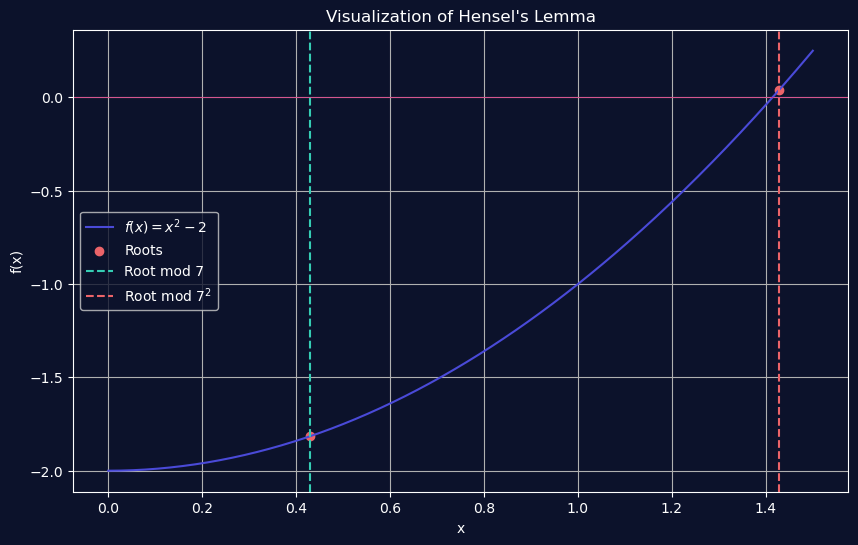

The root of the polynomial modulo 7 is: 0.42857142857142855
The lifted root of the polynomial modulo 49 is: 1.4285714285714286
The real solution is: 1.4142135623730951


In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(f'style/lamarr_dark.mplstyle')

# Define the polynomial function and its derivative
def f(x):
    return x**2 - 2

def f_prime(x):
    return 2*x

# Define the prime p and the initial approximation a0
p = 7
a0 = 3

# Compute the correction term b
# We want to find b such that (f(a0) + b * p * f_prime(a0)) is divisible by p^2
# Start by computing f(a0) and f_prime(a0)
f_a0 = f(a0)
f_prime_a0 = f_prime(a0)

# The correction term b is found by solving the congruence f(a0) + b * p * f_prime(a0) = 0 mod p^2
# This can be rearranged to find b
b = - (f_a0 // p) * pow(f_prime_a0, -1, p) % p

# Lift the solution from modulo p to modulo p**2
a1 = (a0 + b * p) % p**2

a0=a0/7
a1=a1/7
# Create a range of values and compute the polynomial for visualization
val_range = np.linspace(0, 1.5, 400)
f_values = [f(v) for v in val_range]
f_values1 = [(f(v) % p) for v in val_range]
f_values2 = [(f(v) % p**2) for v in val_range]
f_prime_values = [f_prime(v) for v in val_range]

# Plot the polynomial and its roots
plt.figure(figsize=(10, 6))
plt.plot(val_range, f_values, color=f'C0', label='$f(x) = x^2 - 2$')
#plt.plot(val_range, f_values1, label='$f(x) = x^2 - 2 (7)$')
#plt.plot(val_range, f_values2, label='$f(x) = x^2 - 2 (49)$')
#plt.plot(val_range, f_prime_values, label="f'(x) = 2x", linestyle='--')
plt.scatter([a0, a1], [f(a0), f(a1)], color=f'C1', label='Roots')
plt.title('Visualization of Hensel\'s Lemma')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color=f'C3', linewidth=0.5)
plt.axvline(a0, color=f'C2', linestyle='--', label='Root mod 7')
plt.axvline(a1, color=f'C1', linestyle='--', label='Root mod $7^2$')
plt.legend()
plt.show()

print(f"The root of the polynomial modulo 7 is: {a0}")
print(f"The lifted root of the polynomial modulo 49 is: {a1}")
print(f"The real solution is: {2 ** .5}")

**observe**

$$x_0 = 3_7$$

$$x_1=10_{10} = 13_7$$

We may create solutions from right to left.

## A Logician's Point of View: Model Theory of the $p$-adic Numbers

### Reminder: What is first-order Logic?

First-order logic (FOL), also known as predicate logic or first-order predicate calculus, is a collection of formal systems used in mathematics, philosophy, linguistics, and computer science. It is a language for expressing statements about objects, their properties, and their relationships with each other.

**Syntax**

The syntax of FOL consists of a set of symbols divided into several categories:

1. **Variables**: $ x, y, z, \ldots $
2. **Constants**: $ a, b, c, \ldots $
3. **Predicates**: $ P, Q, R, \ldots $
4. **Functions**: $ f, g, h, \ldots $
5. **Logical connectives**: $ \land $ (and), $ \lor $ (or), $ \neg $ (not), $ \rightarrow $ (implies), $ \leftrightarrow $ (if and only if)
6. **Quantifiers**: $ \forall $ (for all), $ \exists $ (there exists)
7. **Equality**: $ = $
8. **Parentheses**: $ (, ) $ for clarifying the structure of formulas

**Formulas**

Formulas in FOL are built from atomic formulas using logical connectives and quantifiers:

- **Atomic formula**: A statement like $ P(x) $ or $ x = y $ that cannot be broken down into simpler statements.
- **Complex formula**: Created by combining atomic formulas using logical connectives, e.g., $ P(x) \land Q(y) $.

Quantifiers bind variables:

- **Universal quantifier**: $ \forall x P(x) $ means "P holds for all x."
- **Existential quantifier**: $ \exists x P(x) $ means "There exists an x for which P holds."

**Semantics**

The semantics of FOL involves the interpretation of these symbols within a structure or domain. The interpretation assigns meanings to the symbols and determines the truth values of formulas within the structure.

**Rules of Inference**

Rules of inference are used to derive conclusions from premises. They include:

* **Modus Ponens (MP)**
If we know that $ P $ is true and $ P \rightarrow Q $ is true, then we can infer $ Q $.
$$
\frac{P, \ P \rightarrow Q}{\therefore Q}
$$

* **Modus Tollens (MT)**
If we know that $ P \rightarrow Q $ is true and $ \neg Q $ is true, then we can infer $ \neg P $.
$$
\frac{P \rightarrow Q, \ \neg Q}{\therefore \neg P}
$$

* **Universal Instantiation (UI)**
Given a universally quantified statement $ \forall x, P(x) $, we can infer $ P(c) $ for any particular element $ c $.
$$
\frac{\forall x P(x)}{\therefore P(c)}
$$

* **Universal Generalization (UG)**
If $ P(c) $ is true for every possible $ c $, then we can infer $ \forall x P(x) $. Note that for this rule to be applied correctly, $ c $ must be arbitrary and not mentioned in any premise.
$$
\frac{\therefore P(c)}{\forall x P(x)}
$$

* **Existential Instantiation (EI)**
If we know that $ \exists x P(x) $ is true, then we can infer $ P(c) $ for some new constant $ c $ that has not appeared in the discourse.
$$
\frac{\exists x P(x)}{\therefore P(c)}
$$

* **Existential Generalization (EG)**
If $ P(c) $ is true for some specific element $ c $, we can infer that $ \exists x P(x) $ is true.
$$
\frac{P(c)}{\therefore \exists x P(x)}
$$

* **Hypothetical Syllogism (HS)**
If $ P \rightarrow Q $ and $ Q \rightarrow R $ are both true, then we can infer $ P \rightarrow R $.
$$
\frac{P \rightarrow Q, \ Q \rightarrow R}{\therefore P \rightarrow R}
$$

* **Disjunctive Syllogism (DS)**
If $ P \lor Q $ is true and $ \neg P $ is true, then we can infer $ Q $.
$$
\frac{P \lor Q, \ \neg P}{\therefore Q}
$$

* **Conjunction Introduction (CI)**
If $ P $ and $ Q $ are both true, then we can infer $ P \land Q $.
$$
\frac{P, \ Q}{\therefore P \land Q}
$$

* **Simplification (SIMP)**
From $ P \land Q $, we can infer $ P $.
$$
\frac{P \land Q}{\therefore P}
$$

* **Addition (ADD)**
If $ P $ is true, then $ P \lor Q $ is also true.
$$
\frac{P}{\therefore P \lor Q}
$$

* **Double Negation (DN)**
If $ \neg \neg P $ is true, then $ P $ is also true.
$$
\frac{\neg \neg P}{\therefore P}
$$

* **Proof by Contradiction (RAA)**
If the negation of $ P $ leads to a contradiction, then $ P $ must be true.
$$
\frac{\neg P \rightarrow (Q \land \neg Q)}{\therefore P}
$$


**Theorems and Proofs**

A theorem in FOL is a formula that can be shown to be true in every possible interpretation, often through a proof, which is a sequence of formulas where each formula is either an axiom or derived from previous formulas by a rule of inference.

**Example**

As an example, consider a domain of humans and the predicate $ H(x) $ meaning "x is happy". The FOL statement

$$ \forall x (H(x) \rightarrow \neg \exists y (y \neq x \land H(y))) $$

translates to "If someone is happy, then nobody else is happy," which could describe a competition where there can be only one winner.

First-order logic is a powerful tool for formal reasoning, providing a rigorous framework to express and deduce truths about a given domain.


### Definability: What Subsets can be Described on the $p$-adic Field

<div class="alert alert-block alert-info">
    <b>Literature:</b>Angus Macintyre. On definable subsets of p-adic fields. J. Symbolic Logic,
41(3):605–610, 1976.</div>


**Definability and Types of Subsets**

MacIntyre categorizes the definable subsets of p-adic fields into three types, defined by certain conditions and polynomial equations:

1. **Type 1**: These are the subsets $\{(m_1, ..., m_n): g(m_1, ..., m_n) \neq 0\}$, where $g$ is a polynomial with coefficients in $M$, and $M[x_1, ..., x_n]$ denotes the polynomial ring. These represent open subsets of $M^n$.

2. **Type 2**: This type includes subsets $\{(m_1, ..., m_n): V(h(m_1, ..., m_n)) \wedge g_2(m_1, ..., m_n) \neq 0\}$, where $h = g_1/g_2$ and both $g_1$ and $g_2$ are polynomials in $M[x_1, ..., x_n]$. This type represents an open subset of $M^n$ due to the valuation ring being open in $M$.

3. **Type 3**: These subsets are defined as $\{(m_1, ..., m_n): P_k(h(m_1, ..., m_n)) \wedge g_2(m_1, ..., m_n) \neq 0\}$, where $h$ is as described above. Type 3 defines the union of an open subset and a closed subset of $M^n$.

The paper states that any infinite definable subset of $M$ has a nonempty interior. This conclusion is drawn immediately from the fact that the zero-set of a polynomial in one variable is either finite or the entire field.


**Field-Theoretic Algebraic Closure and Quantifier Elimination**

MacIntyre's work emphasizes that the field-theoretic algebraic closure of a subset $X$ in $M$, denoted $cl_M(X)$, is simply the algebraic closure of $X$ in $M$. This is derived from the quantifier elimination characterizations given in the paper.

Quantifier elimination is a significant concept in model theory that allows for a more straightforward description of definable sets. The paper demonstrates that by using quantifier elimination in the language of valued fields, one can obtain a clear description of definable subsets in p-adically closed fields. This result is central to the paper's contribution to the understanding of p-adic numbers from a model-theoretical perspective.

The application of quantifier elimination to p-adic fields can simplify complex statements about these fields into simpler, quantifier-free expressions that are easier to analyze and understand.


### VC-dimension in the $p$-adic numbers

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Matthias Aschenbrenner, Alf Dolich, Deirdre Haskell, Dugald Macpherson,
and Sergei Starchenko. Vapnik-Chervonenkis density in some theories without the independence property, I. Trans. Amer. Math. Soc., 368(8):5889–
5949, 2016. </li><li>

Pierre Simon. A Guide to NIP Theories. Lecture Notes in Logic. Cambridge
University Press, 2015.</li></ul></div>

### Beyond the $p$-adics: VC-dimension in Henselian valued fields

<div class="alert alert-block alert-info">
    <b>Literature:</b><ul><li>Sylvy Anscombe and Franziska Jahnke. Characterizing NIP henselian
fields, 2019.</li><li>

Franziska Jahnke and Pierre Simon. NIP henselian valued fields. Arch.
Math. Logic, 59(1-2):167–178, 2020.</li><li>

Will Johnson. Dp-finite fields VI: the dp-finite Shelah conjecture, 2020.</li></ul></div>


## Where are my $p$-adics? $p$-adic Coding

### Negative and Non-Kolmogorov Probabilities

<div class="alert alert-block alert-info">
<b>Literature:</b>Andrei Khrennikov. Interpretations of probability. Walter de Gruyter, 2009</div>

**Example**
Let $S$ be an infinite ensemble of balls. Each ball 
has some color $c \in C={0,1,2,\dots, k, \dots}$(countable).
The $S$ has the following colour structure:
there are $n_k=2^k$ balls with the colour $k \in C$ in $S$.

The volume $N=|S|$ of $S$ is:
$$\begin{equation}
N=\sum_{k=0}^{\infty} n_k=\sum_{k=0}^{\infty} 2^k
\end{equation}$$


This series diverges in the field of real numbers $\mathbb{R}$, **but** it 
converges in the field of 2-adic numbers $\mathbb{Q_2}$
The sum of series:
$$\begin{align}
N=\sum_{k=0}^{\infty} 2^k=\frac{1}{1-2}=-1
\end{align}$$

The proportion of balls with color $k \in C$ in the ensemble $S$:

$$\begin{align}
P_S(k)=\frac{n_k}{N}=-2^k
\end{align}$$

> $n_k=2^k$ is a finite number and $N=-1$ is an infinite number,
the probability $P_S(k)$ is infinitely small probability.

> Such probability is represented by a negative number.

#### Ensemble and frequency theory

*Ensemble Approach: Limit*

**Case 1** appear for infinite statistical ensembles $S$ as the results of the
limit procedure:

$$\begin{equation}
P_S(A=\alpha)=\lim\limits_{N \to \infty}\frac{|S(A=\alpha)\cap S_N|}{|S|},
\end{equation}$$
where a sequence of finite ensembles $\{S_N\}$ gives an approximation of the infinite ensembles $S$. 

**Case 2**
If this limit does not exist in $\mathbb{R}$, then by the regularization procedures like the summation of divergent series or integrals 
can induce negative values for the probabilities.
$$\begin{equation}
P_S(A=\alpha)=\frac{|S(A=\alpha) \cap S_N|}{|S|}
\end{equation}$$



*Ensemble Approach Split of conventional probabilities*

In $p$-adic frameworks this limit can exist and is equal to zero.

> $P_S(A=n)=\lim\limits_{N \to \infty} \frac{1}{N}=0$ for all $n=1,2,\dots.$ Some regularization of this limit
can produce nonzero coefficient $P_S^reg(\alpha)$ 
In $p$-adic framework with respect to $p$-adic topology such coefficients are always **negative**.


> Regularization of *limit* can induce the split of zero conventional probabilities.
These new labels can be defined as infinitely small probabilities.


In $p$-adic examples such new probabilities are given by 
rational numbers larger than $1$.
Similar splits can be obtained for $q \in (0,1)$.
In $0<q<1, q\in \mathbb{Q}$, then there are two sets of labels:
$L_{<q}$ and $L_{>q}$. Thus we have $L_{<q}\subset \mathbb{Q} \cap (-\infty,0)$ 
and $L_{>q}\subset \mathbb{Q} \cap (1,+\infty)$

*Frequency approach: Split of Mises' probabilities*

- $q<0$ and $q>0$ demonstrate the violation of the principle
of the statistical stabilization.

- they also describe the finite(hidden)
 internal structure of some Mises´ collectives.

- infinite sums of infinitely small(**negative**) probabilities might produce conventional
**positive** probabilities.

- nonexistance of conventional conditional probabilities implies
negativity of generalized conditional probabilities.

#### $p$-adic probability theory

$P$-adic analysis gives the possibility to use actual infinities and consider statistical ensembles
with an infinite number of elements. Probabilities are defined via the standard proportion.
>**Properties**:
- negative (rational) probabilities.
- probabilities which are larger than 1.
- the corresponding probabilistic measure is not well defined on a set algebra(the system of events is only a set of semi-algebra)

The rules for $p$-adic probabilities:
- Defining the (partial) order $O$ on the set of $p$-adic integers $\mathbb{Z}_{p}$
- Comparing the probabilities with $p$-adic volume $n(A)$ where $A$ is an event. 
>Thus we say the probability $P(A)$ is larger than probability of $P(B)$ if the $p$-adic volume $n(B)>n(A$).

### Symmetry in Data Mining and Analysis

<div class="alert alert-block alert-info">
<b>Literature:</b>Fionn Murtagh. Symmetry in data mining and analysis: a unifying view
based on hierarchy. Proceedings of the Steklov Institute of Mathematics,
265(1):177–198, 2009.</div>

### Sparse $p$-adic Coding for Computationally Efficient and Effective Big Data Analysis

<div class="alert alert-block alert-info">
<b>Literature:</b>Fionn Murtagh. Sparse p-adic data coding for computationally efficient
and effective big data analytics. P-Adic Numbers, Ultrametric Analysis,
and Applications, 8(3):236–247, 2016.</div>

## Applying what we've learned: $p$-adic computations

### Exact Solving Linear Matrix Equations

<div class="alert alert-block alert-info">
<b>Literature:</b> John D Dixon. Exact solution of linear equations using p-adic expansions. Numerische Mathematik, 40(1):137–141, 1982.
</div>


In [22]:
import numpy as np
from numpy.linalg import det
from math import gcd, log, sqrt

def dixoninv(A, b, p, debug=True):
    # Checking if det(A) and p are coprime
    deta = int(det(A))
    if gcd(deta, p) != 1:
        raise ValueError("det(A) and p not coprime, change p!")

    d = A.shape[0]
    # Finding mc such that mc * A = I (mod p)
    while True:
        mc = np.floor(np.random.rand(d) * p).astype(int)
        prod = np.dot(mc, A) % p
        if np.array_equal(prod, np.eye(d)):
            break
    
    if debug:
        print("Found C, s.t. CA = I (mod {}):".format(p))
        print(mc)

    b_curr = b
    r = np.zeros_like(b)
    beta = max(np.max(np.abs(A)), np.max(np.abs(b)))
    delta = (beta ** d) * (d ** (d / 2))
    o = [''] * len(b)
    m = 2 * int(np.floor(log(delta * 1.618) / log(p)))

    for i in range(m + 2):
        b_old = b_curr
        x = np.dot(mc, b_old) % p
        for j in range(len(x)):
            o[j] += str(x[j])
        b_curr = (b_old - np.dot(A, x)) // p
        r += (p ** i) * x

    # Restoring fractionals from p-adic sequences
    x = np.zeros_like(b)
    for j in range(len(r)):
        u_old = p
        u_curr = r[j]
        v_old = 0
        v_curr = 1
        i = -1
        while u_old > sqrt(p):
            i += 1
            q = u_old // u_curr
            u_temp = u_curr
            u_curr = u_old - q * u_curr
            u_old = u_temp
            v_temp = v_curr
            v_curr = v_old + q * v_curr
            v_old = v_temp
        s = (-1) ** i
        n = u_old
        d = v_old
        if debug:
            print("x[{}] = {} / {} (mod {})".format(j, s * n, d, p))
        x[j] = s * n / d  # Fractional conversion may need more precise handling

    return x

# Define a 2x2 matrix A
A = np.array([[2, 3],
              [6, 7]])

# Define a 2-element vector b
b = np.array([1, 0])

# Define a prime number p
p = 13

# Call the dixoninv function
solution = dixoninv(A, b, p, debug=True)

# Print the solution
print("Solution:", solution)



KeyboardInterrupt: 

### Classification Models $\mathbb{Q}^n_p\mapsto \{0,1\}$

<div class="alert alert-block alert-info">
<b>Literature:</b><ul><li> Patrick Erik Bradley. On p-adic classification. p-Adic Numbers, Ultrametric
Analysis, and Applications, 1(4):271–285, 2009. </li> <li>   
Andrei Khrennikov and Brunello Tirozzi. Learning of p-adic neural networks. Can. Math. Soc. Proc. Ser, 29:395–401, 2000. </li></ul>
</div>

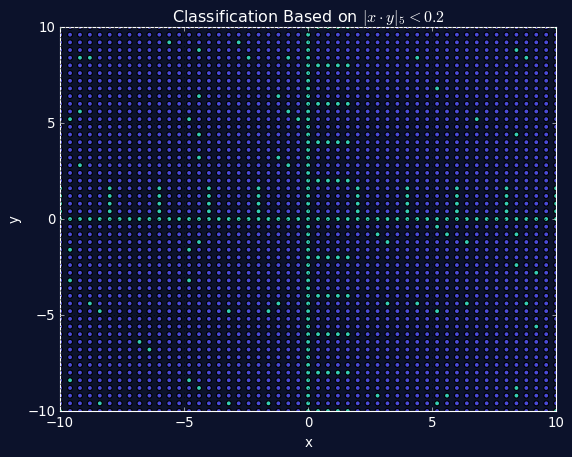

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

def p_adic_norm(a, p):
    """
    Compute the p-adic norm of a rational number 'a' with respect to the prime 'p'.
    
    :param a: Rational number, the number whose p-adic norm is to be found.
    :param p: Integer, the prime number with respect to which the norm is calculated.
    :return: The p-adic norm of 'a'.
    """
    if a == 0:
        return 0

    # Convert the number to a Fraction to handle rationals
    a = Fraction(a)

    # Factor out powers of p from the numerator and denominator
    n, d = a.numerator, a.denominator
    n_power, d_power = 0, 0

    # Count the power of p in the numerator
    while n % p == 0 and n != 0:
        n //= p
        n_power += 1

    # Count the power of p in the denominator
    while d % p == 0 and d != 0:
        d //= p
        d_power += 1

    # Compute the p-adic norm
    return p ** (d_power - n_power)

# Example usage
print(p_adic_norm(.25, 2))  # Example with a rational number
print(p_adic_norm(45, 5))   # Example with an integer


# Parameters
x_range = np.linspace(-10, 10, 51)  # Adjust as needed
y_range = np.linspace(-10, 10, 51)  # Adjust as needed
threshold = .2  # Adjust the threshold as needed

# Prepare data
x_vals = []
y_vals = []
colors = []
p=5

# Classify points
for x in x_range:
    for y in y_range:
        x_vals.append(x)
        y_vals.append(y)
        if p_adic_norm(x*y, p) < threshold: # decision function
            colors.append(f'C2')  # Points that meet the condition
        else:
            colors.append(f'C0')   # Points that do not meet the condition

# Plot
plt.scatter(x_vals, y_vals, c=colors)#, alpha=0.5)
plt.title('Classification Based on $|x \cdot y|_5 < {}$'.format(threshold))
plt.xlabel('x')
plt.ylabel('y')
#plt.axhline(0, color='black',linewidth=0.5)
#plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid(True)
plt.show()


### Multi-modulus Parallelism

<div class="alert alert-block alert-info">
<b>Literature:</b> Xinkai Li, Chao Lu, and Jon A Sjogren. Parallel implementation of exact matrix computation using multiple p-adic arithmetic. In 2013 14th
ACIS International Conference on Software Engineering, Artificial Intelligence, Networking and Parallel/Distributed Computing, pages 296–302.
IEEE, 2013.</div>

Multi-modulus parallelism leverages the Chinese Remainder Theorem (CRT) to perform computations in parallel across different moduli. This method is particularly useful when dealing with large numbers or complex calculations that can be broken down into smaller, more manageable pieces.

**Example**

Compute $ (\frac{1}{17} - 1)\frac{1}{2} $ in parallel using three different primes for the modulus, with a precision of one digit:

- Computation units with different primes: {257, 251, 241}
  - For $ \frac{1}{17} $: {121, 192, 156}
  - For 1: {1, 1, 1}
  - For $ \frac{1}{2} $: {129, 126, 121}



*Parallel Calculation*

Each computation is performed separately, and the results are:

- $ 60 \equiv (121 - 1) \cdot 129 \mod 257 $
- $ 221 \equiv (192 - 1) \cdot 126 \mod 251 $
- $ 198 \equiv (156 - 1) \cdot 121 \mod 241 $



*Combination with Extended CRT*

The results are then combined using the Extended Chinese Remainder Theorem to $-8/17$

```plaintext
extCRT(c(60, 221, 198), c(257, 251, 241))
```

### $p$-adic Random Graphs

<div class="alert alert-block alert-info"> <b>Literature:</b> Hao Hua and Ludger Hovestadt. p-adic numbers encode complex networks.
Scientific Reports, 11(1):1–11, 2021.</div>

In [2]:
def p_adic_expansion(rational_number, p):
    """
    Computes the p-adic expansion of a rational number.

    Parameters:
    rational_number (float): The rational number to compute the p-adic expansion for.
    p (int): The prime base for the p-adic expansion.

    Returns:
    A list of integers representing the p-adic expansion.
    """

    numerator, denominator = abs(rational_number.numerator), abs(rational_number.denominator)

    # Compute the numerator and denominator in base p
    numerator_digits = []
    while numerator > 0:
        numerator, digit = divmod(numerator, p)
        numerator_digits.append(digit)

    denominator_digits = []
    while denominator > 0:
        denominator, digit = divmod(denominator, p)
        denominator_digits.append(digit)

    # Add trailing zeros to the shorter list to make them equal length
    max_length = max(len(numerator_digits), len(denominator_digits))
    numerator_digits += [0] * (max_length - len(numerator_digits))
    denominator_digits += [0] * (max_length - len(denominator_digits))

    # Divide digit by digit to get the p-adic expansion
    expansion = []
    carry = 0
    for i in range(max_length):
        digit = numerator_digits[i] - carry
        if digit < denominator_digits[i]:
            digit += p
            carry = 1
        else:
            carry = 0
        expansion.append(digit - denominator_digits[i])

    # Handle negative numbers
    if rational_number < 0:
        expansion = [-x % p for x in expansion]

    # Remove trailing zeros
    while len(expansion) > 1 and expansion[-1] == 0:
        expansion.pop()

    return expansion

from fractions import Fraction
p_adic_expansion(Fraction(-7,1), 2)



[0, 1, 1]

## Applications

[https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/physics7.htm](https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/physics7.htm)

## Application: Double Slit Experiment

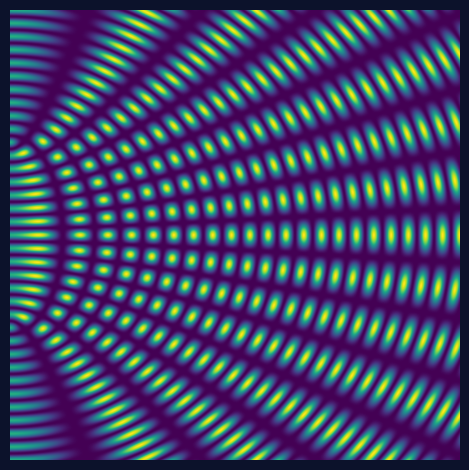

In [4]:
# https://inf.news/en/science/e7c333118b26c25afc7938fdf2e411fa.html
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use(f'style/lamarr_dark.mplstyle')

v=3*(10**8)*(10**6)*(10**(-15)) 

L=0.589

w=2*np.pi*v/L

def func_A(t,q,x,y,x0,y0):
    r = ((x - x0) ** 2 + (y - y0) ** 2) ** 0.5
    A=np.cos(w*(t-r/v)+q)
    return A

fig, ax = plt.subplots()

ax.set_xticks([])
ax.set_yticks([])

def f(t,x, y):
    A1 = func_A(t, 0,x, y, 0, 2)
    A2 = func_A(t,0, x, y, 0, -2)
    return ((A1+A2)**2)

x = np.linspace(0, 8, 1000)
y = np.linspace(-5, 5, 1000).reshape(-1, 1)

ax.imshow(f(0,x, y))

plt.axis('off')
plt.tight_layout()
plt.savefig("interference_pattern.png", bbox_inches='tight', pad_inches=0, transparent=True)
#plt.show()


In [84]:
from manim import *

config.media_width = "100%"
config.pixel_width = 200
config.pixel_height = 200

config.verbosity = "CRITICAL"

import warnings
warnings.filterwarnings('ignore')
#from manimlib.imports import *

In [5]:
%%manim -v WARNING --disable_caching --progress_bar None -qm DoubleSlitExperiment

from manim import *

class DoubleSlitExperiment(Scene):
    def construct(self):
        # Create the slits
        self.camera.background_color = "#0c122b"
        slit_width = 1
        slit_spacing = 1.3
        slit_height = 0.05
        top_slit = Rectangle(width=slit_width, height=slit_height).shift(UP * slit_spacing / 2).set_color("#009EE3")
        bottom_slit = Rectangle(width=slit_width, height=slit_height).shift(DOWN * slit_spacing / 2).set_color("#009EE3")
        slits = VGroup(top_slit, bottom_slit)

        # Create the observation screen
        screen = Rectangle(width=3, height=3.75).shift(RIGHT * 1.5).set_color("#009EE3")

        # Animate the slits and screen
        self.play(Create(slits), Create(screen))

        # Simulate wave propagation with circles
        wave_circles = VGroup(*[
            Circle(radius=i*0.2, stroke_opacity=0.5/slit_spacing).move_to(slit.get_center()).set_color("#E82E82")
            for i in range(1, 20) for slit in slits
        ])

        # Animate waves
        self.play(Create(wave_circles), run_time=3, rate_func=linear)
        self.wait()

        # Show interference pattern
        # This is highly stylized and not a real interference pattern computation
        interference_pattern = ImageMobject("interference_pattern.png")
        interference_pattern.stretch_to_fit_width(screen.width)
        interference_pattern.stretch_to_fit_height(screen.height)
        interference_pattern.move_to(screen.get_center())
        self.play(FadeIn(interference_pattern))
        self.wait()



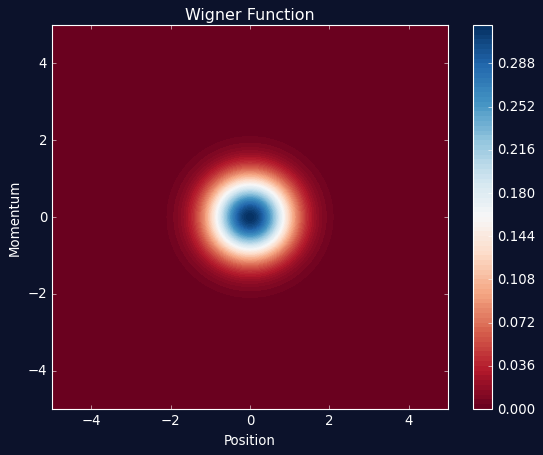

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import wigner, Qobj, coherent

# Parameters for the state and space
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

# Create a quantum state (for example, a ground state of a harmonic oscillator)
state = Qobj(coherent(10, 0))  # You can change this to any state

# Compute Wigner function
W = wigner(state, x, y)

# Plotting
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, W, 100, cmap='RdBu')
plt.colorbar()  # Add a color bar to know the values of Wigner function
plt.title("Wigner Function")
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()


In [4]:
https://en.wikipedia.org/wiki/Wigner_quasiprobability_distribution

SyntaxError: invalid syntax (378235354.py, line 1)